<a href="https://colab.research.google.com/github/NelbaBarreto/programacion-ciencias-datos/blob/trabajo_practico_estadistica/trabajo_practico_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico de Probabilidad y Estadística

Integrantes

*   Nelba Barreto
*   Miguel Franco
*   Guillermo Osorio
*   Gustavo Granada

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
url = "https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/main/data/REG02_EPHC2022.csv"
df = pd.read_csv(url, delimiter=";")

<ipython-input-193-4f94b5c0ea66>:2: DtypeWarning: Columns (228,237) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, delimiter=";")


In [ ]:
# Seleccionamos las columnas en las que estamos interesados
edad = [
    {
        "P02": {
            "renombrar": "edad",
            "descripcion": "Edad del miembro del hogar",
            "mapper": None,
        }
    },
]
sexo = [
    {
        "P06": {
            "renombrar": "sexo",
            "descripcion": "Sexo",
            "mapper": pd.read_csv(io.StringIO('''
Hombres,1
Mujeres,6
'''), header=None)
            }
        },
]
nivel_educativo = [
    {
        "ED02": {
            "renombrar": "educacion_lee_escribe",
            "descripcion": "¿Sabe leer y escribir?",
            "mapper": pd.read_csv(io.StringIO('''
Si,1
"No, porque no aprendió a leer y escribir",2
"No, por la edad avanzada",3
"No, por problema de visión",4
"No, por enfermedad o accidente",5
"No, por otra razón",6
NR,9
NA,Blanco
'''), header=None),
        }
    },
    {
        "ED03": {
            "renombrar": "educacion_estudio_alguna_vez",
            "descripcion": "¿Asiste o asistió alguna vez a una institución de enseñanza formal?",
            "mapper": pd.read_csv(io.StringIO('''
Si,1
No,6
NR,9
NA,Blanco
'''), header=None),
        }
    },
    {
        "ED0504": {
            "renombrar": "educacion_nivel_mas_alto",
            "descripcion": "Nivel y grado más alto que aprobó",
            "mapper": pd.read_csv(io.StringIO('''
Sin instrucción,0
Educación especial,101:112
Educación Inicial,210:212
EEB 1ª al 6ª (Primaria),301:306
EEB 7º al 9º,407:409
Secundario Básico,501:503
Bachiller Humanístico/Científico,604:607
Bachiller Técnico/Comercial,704:706
Bachillerato a distancia,803
Educación Media Científica,901:903
Educación Media Técnica,1001:1003
Educación Media Abierta,1101:1103
Educ. Básica Bilingüe para personas Jóvenes y Adultas,1201:1204
Educ. Media a Distancia para Jóvenes y Adultos,1301:1304
Educ. Básica Alternativa de Jóvenes y Adultos,1401:1403
Educ. Media Alternativa de Jóvenes y Adultos,1501:1504
Educ. Media para Jóvenes y Adultos,1601:1604
Formación profesional no Bachillerato de la Media,1701:1703
Programa de Alfabetización,1801
Grado especial/Programas especiales,1900
Técnica Superior,2001:2004
Formación Docente,2101:2104
Profesionalización Docente,2201:2206
Formación Militar/Policial,2301:2304
Universitario,2401:2406
NR,9999
NA,8888
'''), header=None),
        }
    },
    {
        "ED06C": {
            "renombrar": "educacion_titulo_mas_alto",
            "descripcion": "¿Qué titulo o diploma obtuvo por el nivel formal más alto que curso?",
            "mapper": pd.read_csv(io.StringIO('''
Superior Universitario,1
Docente Educación Inicial,2
Docente EEB (1º y 2º ciclo),3
Docente EEB (3er ciclo),4
Docente Educación Media,5
Militar/Policial,6
Técnica Superior,7
Doctorado (Post universitario),8
Maestría (Post universitario),9
Especialización (Post universitario),10
Formación Docente (Post no universitario),11
Militar/Policial (Post no universitario),12
Técnico Superior (Post no universitario),13
No obtuvo,14
Otro (especificar),15
NR,99
NA,Blanco
'''), header=None),
        }
    },
    {
        "ED08": {
            "renombrar": "educacion_estudia_actualmente",
            "descripcion": "¿Asiste actualmente a una institución de enseñanza formal?",
            "mapper": pd.read_csv(io.StringIO('''
"Sí, Educ. Inicial",1
"Sí, Educ. Escolar BáSíca",2
"Sí, Educación Media Científica",3
"Sí, Educación Media Técnica",4
"Sí, Educación Media Abierta",5
"Sí, Educ. Básíca Bilingüe para personas Jóvenes y Adultas",6
"Sí, Educación Media para Jóvenes y Adultas",7
"Sí, Formación Profesíonal no Bachillerato de la Media",8
"Sí, Programas de Alfabetización",9
"Sí, Educ. Especial",10
"Sí, Grado Especial / Programas Especiales",11
"Sí, Técnica Superior",12
"Sí, Formación Docente",13
"Sí, Profesionalización Docente",14
"Sí, Formación Militar / Policial",15
"Sí, Superior Universítario",16
"Sí, Post Superior no Universítario",17
"Sí, Post Superior Universítario",18
No asiste ,19
NR,99
NA,Blanco
'''), header=None),
        }
    },
    {
        "ED09": {
            "renombrar": "educacion_institucion_donde_estudia",
            "descripcion": "La institución o el programa donde asiste es del sector",
            "mapper": pd.read_csv(io.StringIO('''
Público,1
Privado,2
Privado Subvencionado ,3
NR,9
NA,Blanco
'''), header=None),
        }
    },
    {
        "ED10": {
            "renombrar": "educacion_por_que_no_asiste",
            "descripcion": "¿Por qué no asiste o dejó de asistir?",
            "mapper": pd.read_csv(io.StringIO('''
Sin recursos en el hogar,1
Necesidad de trabajar,2
Muy costosos los materiales y matriculas,3
No tiene edad adecuada ,4
Considera que terminó los estudios,5
No existe institución cercana,6
Institución cercana muy mala,7
El centro educativo cerró,8
El docente no asiste con regularidad ,9
Institución no ofrece escolaridad completa,10
Requiere educación especial,11
Por enfermedad/accidente,12
Realiza labores en el hogar,13
Motivos familiares,14
No quiere estudiar,15
Asiste a enseñanza vocacional o formación profesional,16
Servicio militar,17
Otra razón,18
NR,99
NA,Blanco
'''), header=None),
        }
    },
]
ocupacion = [
    {
        "B01REC": {
            "renombrar": "ocupacion_principal",
            "descripcion": "Código ocupación principal en los últimos 7 días",
            "mapper": pd.read_csv(io.StringIO('''
"Miembros del Poder Ejecutivo, Legislativo y Judicial, personal directivo de la Administración pública y de empresa",1
Profesionales científicos e intelectuales,2
Técnicos y profesionales de nivel medio,3
Empleados de oficina,4
Trabajadores de los servicios y vendedores de comercios y mercados,5
Agricultores y trabajadores Agropecuarios y Pesqueros,6
"Oficiales, operarios y artesanos de artes mecánicas y de otros oficios",7
Operadores de instalaciones y máquinas y montadores,8
Trabajadores no calificados,9
Fuerzas armadas,10
NR,99
NA,Blanco
'''), header=None),
        }
    },
    {
        "B02REC": {
            "renombrar": "ocupacion_rama",
            "descripcion": "Código rama de actividad ocupación principal",
            "mapper": pd.read_csv(io.StringIO('''
"Agricultura, ganadería, caza, silvicultura y pesca",1
Industrias manufactureras,2
"Electricidad, gas y agua",3
Construcciones,4
"Comercio al por mayor y menor, restaurantes y hoteles",5
"Transporte, almacenamiento y comunicaciones",6
"Establecimientos financieros, seguros, bienes inmuebles y servicios prestados a las empresas",7
"Servicios comunales, sociales y personales",8
NR,99
NA,Blanco
'''), header=None),
        }
    },
]
ingresos = [
    {
        "e01aimde": {
            "renombrar": "ingreso_mensual_actividad_principal",
            "descripcion": "Ingreso mensual que habitualmente recibe de la actividad principal",
            "mapper": None,
        }
    },
    {
        "e01bimde": {
            "renombrar": "ingreso_mensual_actividad_secundaria",
            "descripcion": "Ingreso mensual que habitualmente recibe de la actividad secundaria",
            "mapper": None,
        }
    },
    {
        "e01cimde": {
            "renombrar": "ingreso_mensual_otras_actividades",
            "descripcion": "Ingreso mensual que habitualmente recibe de todas las otras actividades",
            "mapper": None,
        }
    },
    {
        "e01dde": {
            "renombrar": "ingreso_alquileres",
            "descripcion": "Ingreso mensual que habitualmente recibe por alquileres o rentas neto",
            "mapper": None,
        }
    },
    {
        "e01ede": {
            "renombrar": "ingreso_dividendos",
            "descripcion": "Ingreso mensual que habitualmente recibe por intereses, dividendos o utilidades",
            "mapper": None,
        }
    },
    {
        "e01fde": {
            "renombrar": "ingreso_ayuda_familiar_nacional",
            "descripcion": "Ingreso mensual que habitualmente recibe como ayuda familiar del país",
            "mapper": None,
        }
    },
    {
        "e02bde": {
            "renombrar": "ingreso_ayuda_familiar_extranjero",
            "descripcion": "Ingreso mensual que habitualmente recibe de ayuda familiar del exterior",
            "mapper": None,
        }
    },
    {
        "e01gde": {
            "renombrar": "ingreso_prestaciones_divorcio_hijos",
            "descripcion": "Ingreso mensual prestaciones por divorcios o cuidado de hijos",
            "mapper": None,
        }
    },
    {
        "e01hde": {
            "renombrar": "ingreso_jubilacion",
            "descripcion": "Ingreso mensual por jubilación",
            "mapper": None,
        }
    },
    {
        "e01ide": {
            "renombrar": "ingreso_estado_tekopora",
            "descripcion": "Ingreso mensual del Estado (Monetario: Tekoporã)",
            "mapper": None,
        }
    },
    {
        "e01jde": {
            "renombrar": "ingreso_pension",
            "descripcion": "Ingreso mensual Pensión (ex combatiente,viudas,etc)",
            "mapper": None,
        }
    },
    {
        "e01kde": {
            "renombrar": "ingreso_pension_adulto_mayor",
            "descripcion": "Ingreso mensual del Estado (Monetario: Adulto Mayor)",
            "mapper": None,
        }
    },
    {
        "e01lde": {
            "renombrar": "ingreso_publico_viveres",
            "descripcion": "Ingreso por víveres de alguna Institución pública",
            "mapper": None,
        }
    },
    {
        "e01mde": {
            "renombrar": "ingreso_otros_varios",
            "descripcion": "Ingreso mensual que habitualmente recibe por otros ingresos",
            "mapper": None,
        }
    },
    {
        "e01kjde": {
            "renombrar": "ingreso_agro",
            "descripcion": "Ingreso mensual que habitualmente recibe por otros ingresos agro asignados al jefe",
            "mapper": None,
        }
    },
    {
        "quintili": {
            "renombrar": "quintil",
            "descripcion": "Quintiles de ingreso per cápita mensual para el total país",
            "mapper": None,
        }
    },
    {
        "decili": {
            "renombrar": "decil",
            "descripcion": "Deciles de ingreso per cápita mensual para el total país",
            "mapper": None,
        }
    }
]


def obtener_claves(lista):
    return [list(d.keys())[0] for d in lista]

columnas_seleccionadas = obtener_claves(edad + sexo + nivel_educativo + ocupacion + ingresos)

In [ ]:
df = df[columnas_seleccionadas]
df.columns

Index(['P02', 'P06', 'ED02', 'ED03', 'ED0504', 'ED06C', 'ED08', 'ED09', 'ED10',
       'B01REC', 'B02REC', 'e01aimde', 'e01bimde', 'e01cimde', 'e01dde',
       'e01ede', 'e01fde', 'e02bde', 'e01gde', 'e01hde', 'e01ide', 'e01jde',
       'e01kde', 'e01lde', 'e01mde', 'e01kjde', 'quintili', 'decili'],
      dtype='object')

In [ ]:
# renombramos columnas
def renombrar_columnas(df, lista):
    for d in lista:
        for k, v in d.items():
            df.rename(columns={k: v["renombrar"]}, inplace=True)

renombrar_columnas(df, edad + sexo + nivel_educativo + ocupacion + ingresos)
df.columns

Index(['edad', 'sexo', 'educacion_lee_escribe', 'educacion_estudio_alguna_vez',
       'educacion_nivel_mas_alto', 'educacion_titulo_mas_alto',
       'educacion_estudia_actualmente', 'educacion_institucion_donde_estudia',
       'educacion_por_que_no_asiste', 'ocupacion_principal', 'ocupacion_rama',
       'ingreso_mensual_actividad_principal',
       'ingreso_mensual_actividad_secundaria',
       'ingreso_mensual_otras_actividades', 'ingreso_alquileres',
       'ingreso_dividendos', 'ingreso_ayuda_familiar_nacional',
       'ingreso_ayuda_familiar_extranjero',
       'ingreso_prestaciones_divorcio_hijos', 'ingreso_jubilacion',
       'ingreso_estado_tekopora', 'ingreso_pension',
       'ingreso_pension_adulto_mayor', 'ingreso_publico_viveres',
       'ingreso_otros_varios', 'ingreso_agro', 'quintil', 'decil'],
      dtype='object')

In [ ]:
# Reemplazar las cadenas vacías en el campo educacion_nivel_mas_alto con 0
df["educacion_nivel_mas_alto"] = df["educacion_nivel_mas_alto"].replace(" ", 0)

# Crear una nueva columna que contenga la descripción del nivel más alto
# cursado de educación
educacion_dict = {
    "Sin instrucción": [0],
    "Educación especial": list(range(101, 113)),
    "Educación Inicial": list(range(210, 213)),
    "EEB 1ª al 6ª (Primaria)": list(range(301, 307)),
    "EEB 7º al 9º": list(range(407, 410)),
    "Secundario Básico": list(range(501, 504)),
    "Bachiller Humanístico/Científico": list(range(604, 608)),
    "Bachiller Técnico/Comercial": list(range(704, 707)),
    "Bachillerato a distancia": [803],
    "Educación Media Científica": list(range(901, 904)),
    "Educación Media Técnica": list(range(1001, 1004)),
    "Educación Media Abierta": list(range(1101, 1104)),
    "Educ. Básica Bilingüe para personas Jóvenes y Adultas": list(range(1201, 1205)),
    "Educ. Media a Distancia para Jóvenes y Adultos": list(range(1301, 1305)),
    "Educ. Básica Alternativa de Jóvenes y Adultos": list(range(1401, 1404)),
    "Educ. Media Alternativa de Jóvenes y Adultos": list(range(1501, 1505)),
    "Educ. Media para Jóvenes y Adultos": list(range(1601, 1605)),
    "Formación profesional no Bachillerato de la Media": list(range(1701, 1704)),
    "Programa de Alfabetización": [1801],
    "Grado especial/Programas especiales": [1900],
    "Técnica Superior": list(range(2001, 2005)),
    "Formación Docente": list(range(2101, 2105)),
    "Profesionalización Docente": list(range(2201, 2207)),
    "Formación Militar/Policial": list(range(2301, 2305)),
    "Universitario": list(range(2401, 2407))
}

def obtener_etiqueta_educacion(valor):
    for etiqueta, rango in educacion_dict.items():
        if int(valor) in rango:
            return etiqueta
    return "Desconocido"  # Para valores que no están en ningún rango

# Asignar la etiqueta del nivel de educación según el diccionario de datos
df["etiqueta_educacion"] = df["educacion_nivel_mas_alto"].apply(obtener_etiqueta_educacion)


# Explicación del Problema
Se describe los datos: a qué corresponde, ubicación temporal.

In [ ]:
# Vista previa de los datos
df.head()

,edad,sexo,educacion_lee_escribe,educacion_estudio_alguna_vez,educacion_nivel_mas_alto,educacion_titulo_mas_alto,educacion_estudia_actualmente,educacion_institucion_donde_estudia,educacion_por_que_no_asiste,ocupacion_principal,...,ingreso_jubilacion,ingreso_estado_tekopora,ingreso_pension,ingreso_pension_adulto_mayor,ingreso_publico_viveres,ingreso_otros_varios,ingreso_agro,quintil,decil,etiqueta_educacion
0,42,6,1,1,306,,19,,1,9,...,0,0,0,0,0,0,0,4,7,EEB 1ª al 6ª (Primaria)
1,14,1,1,1,408,,2,1,,,...,0,0,0,0,0,0,0,4,7,EEB 7º al 9º
2,12,1,1,1,306,,2,1,,,...,0,0,0,0,0,0,0,4,7,EEB 1ª al 6ª (Primaria)
3,20,6,1,1,903,,19,,1,,...,0,0,0,0,0,0,0,4,7,Educación Media Científica
4,25,1,1,1,2001,7,19,,1,8,...,0,0,0,0,0,0,0,4,7,Técnica Superior


# Identificación de Variables
Se describen las variables que se utilizarán en el problema, cómo se encuentran codificadas. Tipo de variable.

In [ ]:
# Identificar el tipo de variable de cada columna
print(df.dtypes)

edad                                     int64
sexo                                     int64
educacion_lee_escribe                   object
educacion_estudio_alguna_vez            object
educacion_nivel_mas_alto                object
educacion_titulo_mas_alto               object
educacion_estudia_actualmente           object
educacion_institucion_donde_estudia     object
educacion_por_que_no_asiste             object
ocupacion_principal                     object
ocupacion_rama                          object
ingreso_mensual_actividad_principal     object
ingreso_mensual_actividad_secundaria    object
ingreso_mensual_otras_actividades       object
ingreso_alquileres                      object
ingreso_dividendos                      object
ingreso_ayuda_familiar_nacional         object
ingreso_ayuda_familiar_extranjero       object
ingreso_prestaciones_divorcio_hijos     object
ingreso_jubilacion                      object
ingreso_estado_tekopora                 object
ingreso_pensi

In [ ]:
# Transformamos las variables numericas a su correspondiente. HAY UNA CUESTION RARA ACA, HAY NUMEROS QUE TIENEN HASTA TRES DECIMALES. POR EL MOMENTO REDONDEO NO MAS
def convertir_a_entero_redondeado(s):
    if type(s) == str:
        s_sin_comas = s.replace(',', '.')
        s_sin_comas = float(s_sin_comas)
        numero_redondeado = round(float(s_sin_comas))
        return int(numero_redondeado)
    else:
        return s

for c in df.columns:
    if c.startswith("ingreso_"):
        print(c)
        df[c] = df[c].apply(convertir_a_entero_redondeado)

ingreso_mensual_actividad_principal
ingreso_mensual_actividad_secundaria
ingreso_mensual_otras_actividades
ingreso_alquileres
ingreso_dividendos
ingreso_ayuda_familiar_nacional
ingreso_ayuda_familiar_extranjero
ingreso_prestaciones_divorcio_hijos
ingreso_jubilacion
ingreso_estado_tekopora
ingreso_pension
ingreso_pension_adulto_mayor
ingreso_publico_viveres
ingreso_otros_varios
ingreso_agro


In [ ]:
df.dtypes

edad                                     int64
sexo                                     int64
educacion_lee_escribe                   object
educacion_estudio_alguna_vez            object
educacion_nivel_mas_alto                object
educacion_titulo_mas_alto               object
educacion_estudia_actualmente           object
educacion_institucion_donde_estudia     object
educacion_por_que_no_asiste             object
ocupacion_principal                     object
ocupacion_rama                          object
ingreso_mensual_actividad_principal      int64
ingreso_mensual_actividad_secundaria     int64
ingreso_mensual_otras_actividades        int64
ingreso_alquileres                       int64
ingreso_dividendos                       int64
ingreso_ayuda_familiar_nacional          int64
ingreso_ayuda_familiar_extranjero        int64
ingreso_prestaciones_divorcio_hijos      int64
ingreso_jubilacion                       int64
ingreso_estado_tekopora                  int64
ingreso_pensi

In [ ]:
# Describir las variables
print(df.describe())

               edad          sexo  ingreso_mensual_actividad_principal  \
count  17379.000000  17379.000000                         1.737900e+04   
mean      31.919788      3.531791                         1.110814e+06   
std       21.687734      2.499870                         2.875037e+06   
min        0.000000      1.000000                         0.000000e+00   
25%       14.000000      1.000000                         0.000000e+00   
50%       29.000000      6.000000                         0.000000e+00   
75%       48.000000      6.000000                         1.767097e+06   
max      102.000000      6.000000                         1.126320e+08   

       ingreso_mensual_actividad_secundaria  \
count                          1.737900e+04   
mean                           6.813385e+04   
std                            7.269228e+05   
min                            0.000000e+00   
25%                            0.000000e+00   
50%                            0.000000e+00   
75% 

## Filtros

In [ ]:
# Filtrar los datos de las personas que están en el rango de edad de 22 a 55 y
# cuyo ingreso mensual de la actividad principal es mayor a 40 millones
mask = ((df["edad"] >= 22) & (df["edad"] <= 55)) & (df["ingreso_mensual_actividad_principal"] <= 40000000)
df = df[mask]

print(len(df))

7708


# Gráfico
Presentar gráficos de la distribución de las variables utilizadas. Realizar una corta explicación.

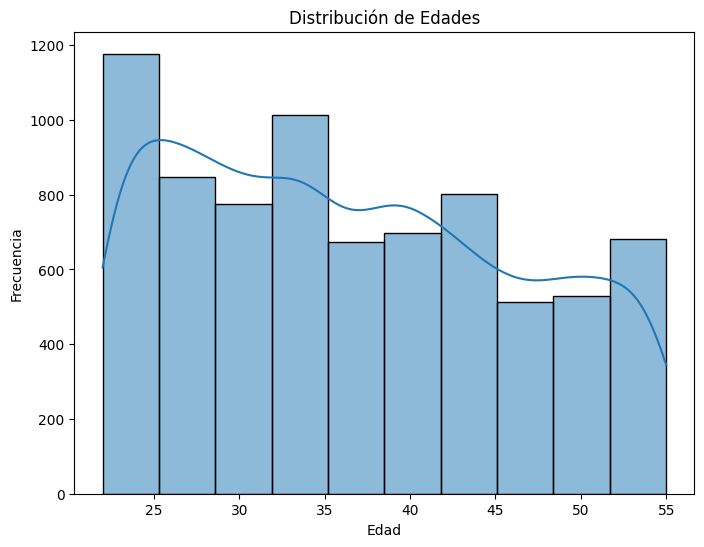

In [ ]:
# Ejemplo: Histograma de una variable numérica
plt.figure(figsize=(8, 6))
sns.histplot(df['edad'], bins=10, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

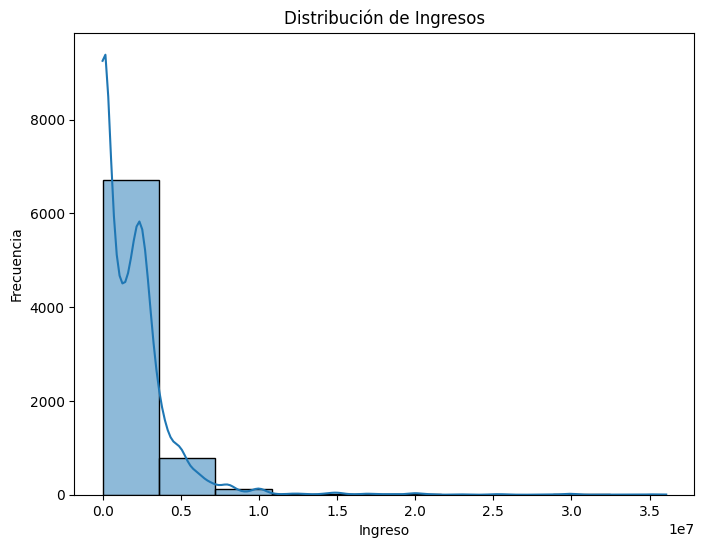

In [ ]:
# Histograma de Ingreso
plt.figure(figsize=(8, 6))
sns.histplot(df['ingreso_mensual_actividad_principal'], bins=10, kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()


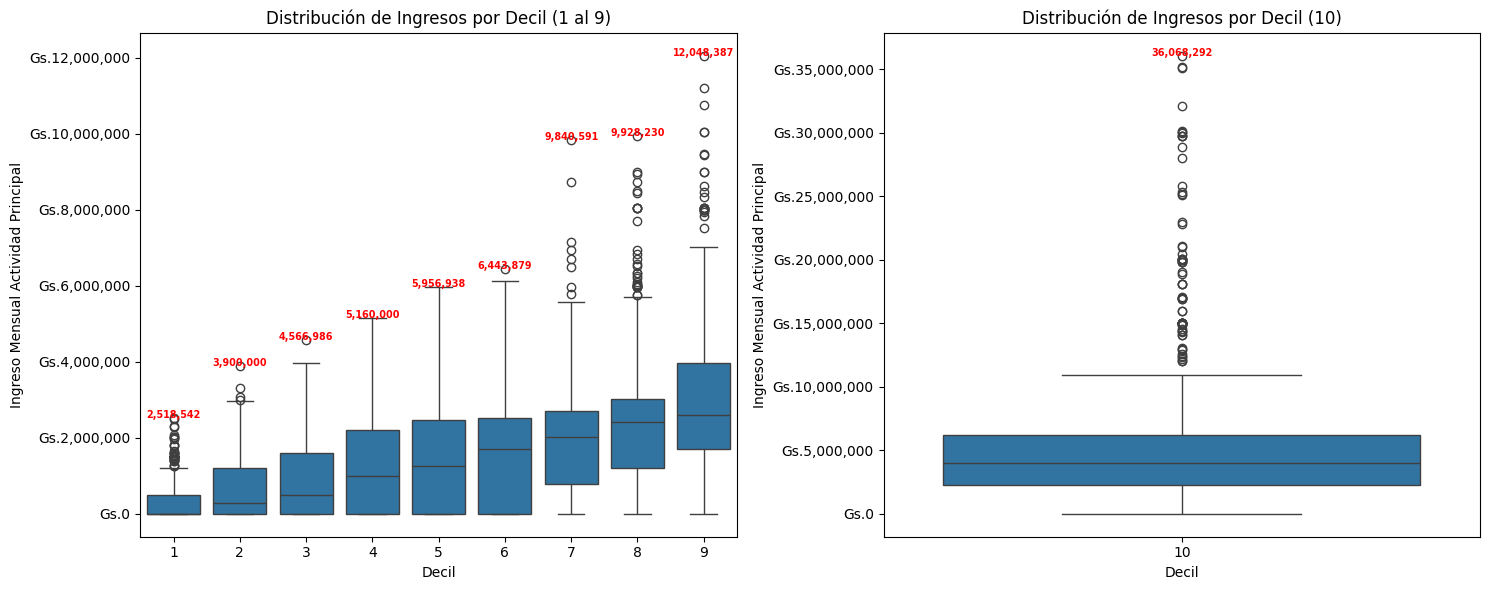

In [ ]:
# Asumiendo que tu DataFrame se llama df
# Filtrando los datos para los deciles 1 al 9 y el decil 10
mask_1_9 = (df["decil"] != " ") & (df["decil"] != "10")
mask_10 = df["decil"] == "10"

decil_filtered_df_1_9 = df[mask_1_9][["decil", "ingreso_mensual_actividad_principal"]].sort_values(by="decil")
decil_filtered_df_10 = df[mask_10][["decil", "ingreso_mensual_actividad_principal"]]

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de caja para los deciles 1 al 9
sns.boxplot(ax=axs[0], x="decil", y="ingreso_mensual_actividad_principal", data=decil_filtered_df_1_9)
axs[0].set_xlabel("Decil")
axs[0].set_ylabel("Ingreso Mensual Actividad Principal")
axs[0].set_title("Distribución de Ingresos por Decil (1 al 9)")

# Gráfico de caja para el decil 10
sns.boxplot(ax=axs[1], x="decil", y="ingreso_mensual_actividad_principal", data=decil_filtered_df_10)
axs[1].set_xlabel("Decil")
axs[1].set_ylabel("Ingreso Mensual Actividad Principal")
axs[1].set_title("Distribución de Ingresos por Decil (10)")

# Formatear las etiquetas del eje y
def currency(x, pos):
    return "Gs.{:,.0f}".format(x)

# Aplicar el formateador a ambos subplots
formatter = FuncFormatter(currency)
axs[0].yaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)

# Añadir valores máximos en cada boxplot
for ax, data, title in zip(axs, [decil_filtered_df_1_9, decil_filtered_df_10], ["1 al 9", "10"]):
    max_vals = data.groupby("decil")["ingreso_mensual_actividad_principal"].max()
    for decil, max_val in max_vals.items():
        # Encontrar la posición del decil en el eje x
        x_position = list(data["decil"].unique()).index(decil)
        # Añadir la anotación
        ax.text(x_position, max_val, f"{max_val:,.0f}", horizontalalignment="center", size="x-small", color="red", fontweight="semibold")

plt.tight_layout()
plt.show()

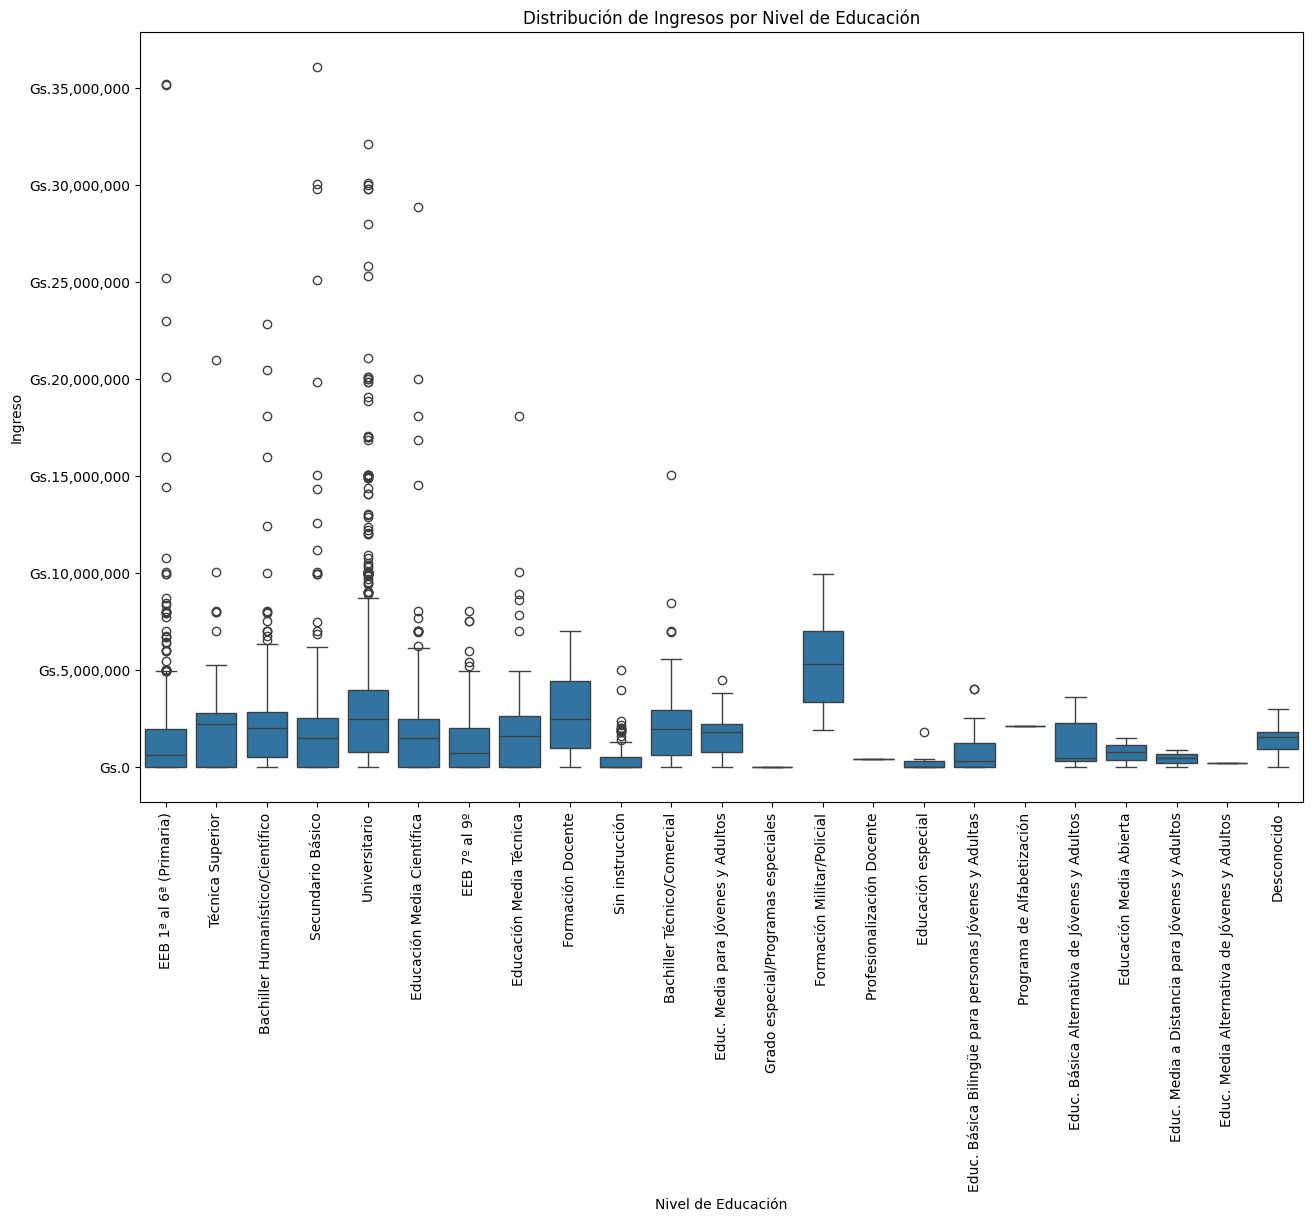

In [ ]:
# Crear un gráfico de caja para la relación entre ingreso y educación
plt.figure(figsize=(15, 10))
sns.boxplot(x='etiqueta_educacion', y='ingreso_mensual_actividad_principal', data=df)
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
plt.xlabel('Nivel de Educación')
plt.ylabel('Ingreso')
plt.title('Distribución de Ingresos por Nivel de Educación')

# Formatear las etiquetas del eje y
def currency(x, pos):
    return 'Gs.{:,.0f}'.format(x)

formatter = FuncFormatter(currency)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Intervalo de Confianza
Elegir dos variables en una calcular el promedio y en la otra la proporción.

1.   Determinar el intervalo de confianza del 95% para la media y para la proporción.
2.   Interpretar los intervalos de confianza determinados.

## Variable 1: ingreso_mensual_actividad_principal

In [ ]:
# Determinar el intervalo de confianza del 95% para la media del ingreso mensual
ingreso = df["ingreso_mensual_actividad_principal"].dropna()

# Calcular el promedio y el intervalo de confianza del 95% para la media
media = np.mean(ingreso)
sem = stats.sem(ingreso)  # Error estándar de la media
intervalo_confianza_media = stats.t.interval(0.95, len(ingreso)-1, loc=media, scale=sem)

print(f"Promedio: {media}")
print(f"Intervalo de confianza del 95% para la media: {intervalo_confianza_media}")

Promedio: 1887458.1498443177
Intervalo de confianza del 95% para la media: (1830393.067408513, 1944523.2322801223)


## Variable 2: educacion

In [ ]:
# Calcular la proporción de personas con educación universitaria
educacion_universitario = df["etiqueta_educacion"] == "Universitario"
proporcion_universitario = educacion_universitario.mean()

# Calcular el intervalo de confianza del 95% para la proporción
n = len(educacion_universitario)
z = stats.norm.ppf(0.975)  # Valor z para un intervalo de confianza del 95%
se_proporcion = np.sqrt(proporcion_universitario * (1 - proporcion_universitario) / n)
intervalo_confianza_proporcion = (
    proporcion_universitario - z * se_proporcion,
    proporcion_universitario + z * se_proporcion
)

print(f"Proporción: {proporcion_universitario}")
print(f"Intervalo de confianza del 95% para la proporción: {intervalo_confianza_proporcion}")


Proporción: 0.25207576543850546
Intervalo de confianza del 95% para la proporción: (0.24238246690841447, 0.26176906396859645)


# Prueba de Hipótesis
Elegir las variables de modo a realizar una prueba de hipótesis para la media (diferencia de medias) y para la proporción (diferencia de proporciones).


1.   Hipótesis nula y alternativa: escribir las hipótesis. Explicar el problema y la pregunta de la investigación.
2.   Tipo de contraste: especificar qué tipo de contraste se aplicará y su justificación.
3.   Interpretación: en función de los resultados obtenidos concluir si se acepta o se rechaza la hipótesis nula.



# Resumen Ejecutivo
Explicar los hallazgos utilizando un vocabulario preciso pero entendible por un “no experto” en estadística.